In [2]:
import pandas as pd
import numpy as np
import ast
import json
from datetime import datetime
import seaborn as sns
# build a simple linear regression in python
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

In [3]:
df = pd.read_csv('final_listing_dataframe.csv', engine='python')
df

,address,bath,bedrooms,borough,extra,nearest_subway,neighborhood,rent,sqft,median_income,...,Walk_In_Closet,Deck,Lounge,Concierge,Storage_Facility,High_Speed_Internet,Studio,Brooklyn,Manhattan,Queens
0,453 Milford Street,1.0,3,Brooklyn,"['Dogs Allowed', 'Dishwasher', 'Microwave', 'C...",0.50,New Lots,2200,0,63700.0,...,0,0,0,0,0,0,0,1,0,0
1,37 King St,1.0,1,Manhattan,"['Elevator', 'Dogs Allowed', 'Dishwasher', 'Ca...",0.06,Hudson Square,4500,0,106056.0,...,0,0,0,0,0,0,0,0,1,0
2,Hudson St,2.0,2,Manhattan,[],0.18,Hudson Square,9395,0,106056.0,...,0,0,0,0,0,0,0,0,1,0
3,600 West 42nd Street,1.0,1,Manhattan,"['Elevator', 'Dogs Allowed', 'Dishwasher', 'Ca...",0.38,Hell's Kitchen,4300,0,93707.0,...,0,0,0,0,0,0,0,0,1,0
4,785 Ninth Avenue 3c,1.0,2,Manhattan,"['Brand New Renovations', 'Dogs Allowed', 'Red...",0.21,Hell's Kitchen,3199,700,93707.0,...,0,0,0,0,0,0,0,0,1,0
5,785 Ninth Avenue 3c,1.0,2,Manhattan,"['Brand New Renovations', 'Dogs Allowed', 'Red...",0.21,Hell's Kitchen,3199,700,93707.0,...,0,0,0,0,0,0,0,0,1,0
6,785 Ninth Avenue 3c,1.0,2,Manhattan,"['Brand New Renovations', 'Dogs Allowed', 'Red...",0.21,Hell's Kitchen,3199,700,93707.0,...,0,0,0,0,0,0,0,0,1,0
7,312 W 58th Street,2.0,4,Manhattan,"['No Fee', 'Laundry In Building', 'Dogs Allowe...",0.08,Hell's Kitchen,7150,1,93707.0,...,0,0,0,0,0,0,0,0,1,0
8,321 W 47th St,2.0,2,Manhattan,"['No Fee', 'Dogs Allowed', 'Dishwasher', 'Expo...",0.17,Hell's Kitchen,3500,0,93707.0,...,0,0,0,0,0,0,0,0,1,0
9,524 West 50th Street,1.0,1,Manhattan,"['Laundry In Building', 'Pre War Laundry On Ev...",0.41,Hell's Kitchen,1999,500,93707.0,...,0,0,0,0,0,0,1,0,1,0


In [4]:
test = df[0:500]

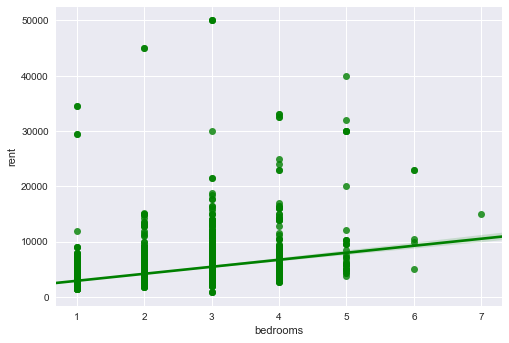

In [5]:
import matplotlib as plt
from matplotlib import style
import seaborn as sns

ax = sns.regplot(x= 'bedrooms', y='rent', data = df, color = 'green')
#this scatterplot chart showing the price over time

In [37]:
from statsmodels.formula.api import ols

lr_model = ols(formula='rent~bath+Queens+Brooklyn+bedrooms+Elevator+No_Fee+Doorman+Gym+Common_Outdoor_Space+Laundry_In_Unit+Parking+Pre_War+Valet+Walk_In_Closet+Lounge+neighborhood', data=test).fit()


In [38]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     101.3
Date:                Thu, 18 Apr 2019   Prob (F-statistic):          1.57e-138
Time:                        22:23:33   Log-Likelihood:                -3980.2
No. Observations:                 500   AIC:                             7992.
Df Residuals:                     484   BIC:                             8060.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                       815.3520    125.041      6.521      0.000     569.661    1061.043
neighborhood[T.Hudson Square]  3387.6166    507.401      6.676      0.000    2390.635    4384.598
neighborhood[T.New Lots]       -950.3893    357.291     -2.660      0.008   -1652.423    -248.356
bath                           1450.5987     90.700     15.993      0.000    1272.384    1628.814
Queens                        -4.762e-12   6.76e-13     -7.046      0.000   -6.09e-12   -3.43e-12
Brooklyn                       -950.3893    357.291     -2.660      0.008   -1652.423    -248.356
bedrooms                        611.6093     49.361     12.391      0.000     514.621     708.598
Elevator                       -293.2637    117.664     -2.492      0.013    -524.459     -62.069
No_Fee                         -255.8505     87.752     -2.916      0.004    -428.272     -83.429
Doorman                         806.2235    122.834      6.564      0.000     564.870    1047.577
Gym                             241.5239    111.550      2.165      0.031      22.341     460.706
Common_Outdoor_Space           -269.6238     92.790     -2.906      0.004    -451.945     -87.303
Laundry_In_Unit                 543.6876     71.246      7.631      0.000     403.698     683.677
Parking                        -192.7452     90.594     -2.128      0.034    -370.752     -14.738
Pre_War                        -404.2975    102.256     -3.954      0.000    -605.218    -203.377
Valet                          -226.7135     96.348     -2.353      0.019    -416.025     -37.402
Walk_In_Closet                 -305.5551     82.326     -3.712      0.000    -467.316    -143.794
Lounge                          175.2601     94.968      1.845      0.066     -11.340     361.860
==============================================================================
Omnibus:                      262.272   Durbin-Watson:                   1.675
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3812.692
Skew:                           1.925   Prob(JB):                         0.00
Kurtosis:                      15.968   Cond. No.                     1.81e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.41e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [8]:
test.neighborhood.unique()

array(['New Lots', 'Hudson Square', "Hell's Kitchen"], dtype=object)

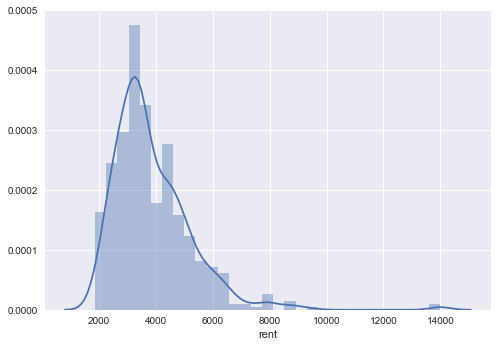

In [9]:
sns.distplot(test.rent)

In [10]:
df[df['rent']>10000]

,address,bath,bedrooms,borough,extra,nearest_subway,neighborhood,rent,sqft,median_income,...,Walk_In_Closet,Deck,Lounge,Concierge,Storage_Facility,High_Speed_Internet,Studio,Brooklyn,Manhattan,Queens
478,West 57th Street,3.0,4,Manhattan,"['No Fee', 'Dogs Allowed', 'Dishwasher', 'High...",0.58,Hell's Kitchen,14000,0,93707.0,...,0,0,0,0,0,0,0,0,1,0
481,West 57th Street,3.0,4,Manhattan,"['No Fee', 'Dogs Allowed', 'Dishwasher', 'High...",0.58,Hell's Kitchen,14000,0,93707.0,...,0,0,0,0,0,0,0,0,1,0
519,West 57th Street,3.0,4,Manhattan,"['No Fee', 'Dogs Allowed', 'Dishwasher', 'High...",0.61,Hell's Kitchen,14000,0,93707.0,...,0,0,0,0,0,0,0,0,1,0
639,626 1st Avenue,2.0,2,Manhattan,"['No Fee', 'Elevator', 'Laundry In Building', ...",0.53,Murray Hill,12000,0,109250.0,...,0,0,0,0,1,0,0,0,1,0
856,400 West 63rd Street,3.0,3,Manhattan,"['No Fee', 'Elevator', 'Laundry In Building', ...",0.43,Lincoln Square,13330,0,123951.0,...,0,0,0,0,0,0,0,0,1,0
857,400 West 63rd Street,3.0,3,Manhattan,"['No Fee', 'Elevator', 'Laundry In Building', ...",0.43,Lincoln Square,13330,0,123951.0,...,0,0,0,0,0,0,0,0,1,0
885,Broadway,3.0,3,Manhattan,"['Laundry In Building', 'Lounge', 'High Ceilin...",0.07,Lincoln Square,15700,0,123951.0,...,1,1,1,1,0,0,0,0,1,0
889,West 67th Sreet,2.5,3,Manhattan,"['No Fee', 'Elevator', 'Laundry In Building', ...",0.19,Lincoln Square,11000,0,123951.0,...,0,0,0,0,0,0,0,0,1,0
907,W 62nd St,2.5,2,Manhattan,"['No Fee', 'Dogs Allowed', 'Dishwasher', 'High...",0.23,Lincoln Square,15100,0,123951.0,...,0,0,0,0,0,0,0,0,1,0
936,60 Riverside Boulevard,3.0,3,Manhattan,"['Dogs Allowed', 'Cats Allowed', 'Doorman', 'S...",0.46,Lincoln Square,16500,0,123951.0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
sns.pairplot(df)

Text(0.5, 1.0, 'Correlation plot')

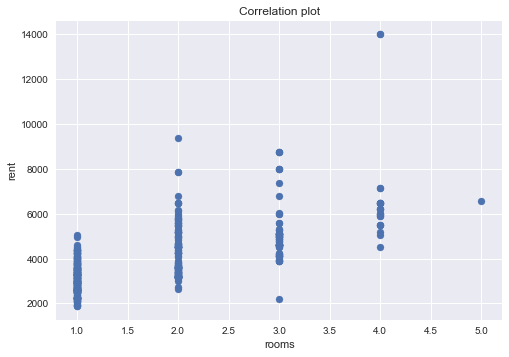

In [17]:
plt.pyplot.scatter(test.bedrooms, test.rent)
plt.pyplot.xlabel('rooms')
plt.pyplot.ylabel('rent')
plt.pyplot.title("Correlation plot")